# Importing Libraries

In [1]:
# Basic imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the given file and basic checks

df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
print(df.shape)
df.head(3)

(1200, 28)


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4


### Information about data

In [3]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [4]:
# Dropping unnecessary columnns
df.drop(['EmpNumber'], axis=1, inplace=True)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


# Department wise Performance Rating

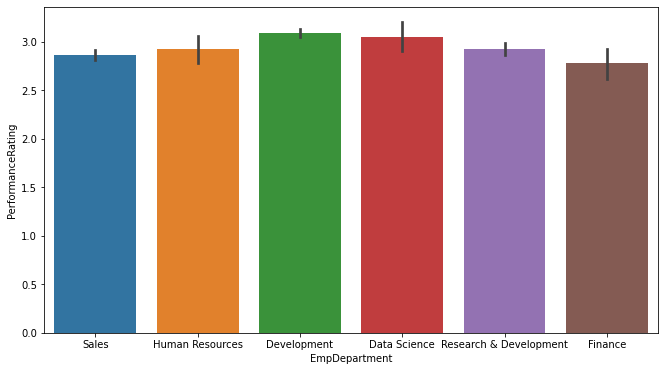

In [5]:
# plotted graph by using BarPlot
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
sns.barplot(df['EmpDepartment'],df['PerformanceRating'])
plt.show()

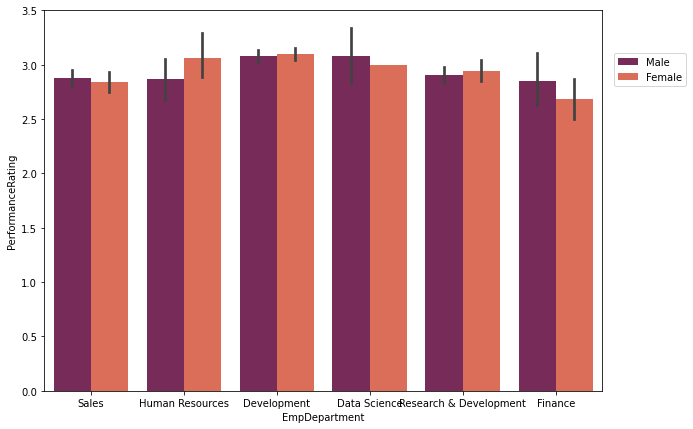

In [6]:
#plotted the graph by using bar plot
plt.rcParams["figure.figsize"]=10,7
ax = sns.barplot(x="EmpDepartment", y="PerformanceRating" , hue="Gender",
                    data=df, palette="rocket")
plt.legend(bbox_to_anchor=(1.16, 0.9))

<AxesSubplot:xlabel='EmpDepartment'>

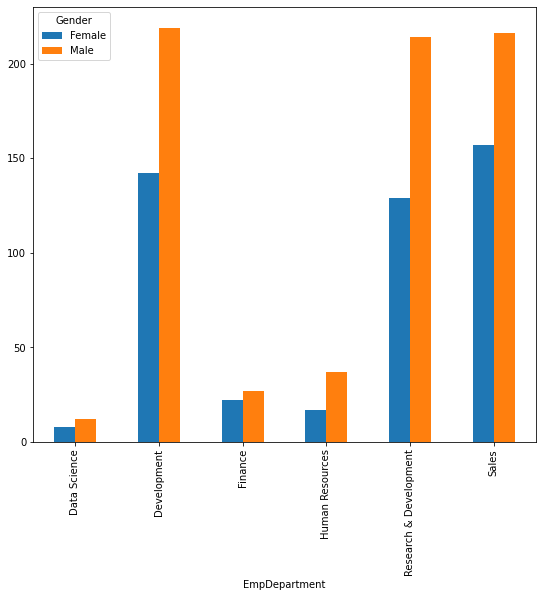

In [7]:
#plotting departmentwise Gender
plt = df.groupby("EmpDepartment").Gender.value_counts().sort_values(ascending=False)
plt.unstack().plot(kind="bar",figsize=(9,8),width=0.5)

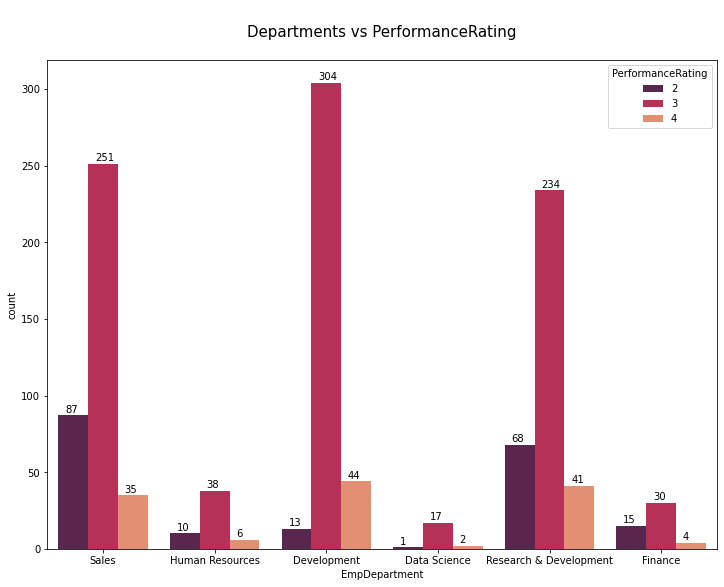

In [8]:
# plotting the graph by using countplot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
ax = sns.countplot(x=df['EmpDepartment'],hue= df["PerformanceRating"],palette='rocket')
plt.title("\nDepartments vs PerformanceRating\n",fontsize=15,color='black')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))
plt.show()

From the above graph we can conclude that from the EmpDepartment Development dept is showing High performance rating

In [9]:
#Percent count of EmpDepartment with performance Rating

print("\033[1m\nPercent count of EmpDepartment with Performance Rating:")
t = pd.crosstab(df["PerformanceRating"], df["EmpDepartment"], margins=True,normalize=True)
round(t.multiply(100),2)


Percent count of EmpDepartment with Performance Rating:


EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


## Performance Rating with respect to gender

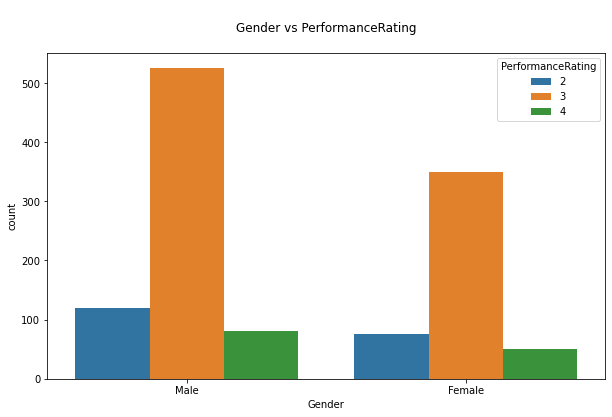

In [10]:
#Plotting the graph for gender
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x=df["Gender"],hue= df['PerformanceRating'],palette='tab10')
plt.title("\nGender vs PerformanceRating\n")
plt.show()

The male performance rating the little bit higher compared to female. 

## Age Analysis

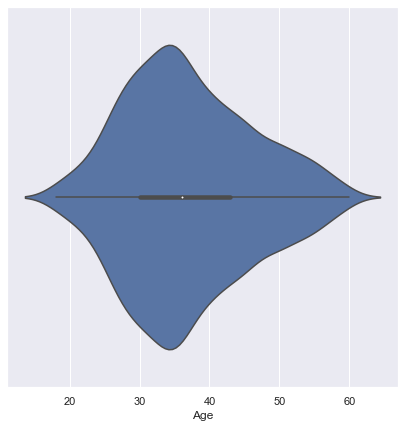

In [11]:
# showing age analysis using violin plot 
plt.figure(figsize=(7,7))
sns.set_theme(style="darkgrid")
sns.violinplot(x=df["Age"])
plt.show()

The age distribution is starting from 18 to 60 where the most of the employees are lying between 30 to 40 age count.

In [12]:
## Percent count of EmpLastSalaryHikePercent with Performance Rating

print("\033[1m\nPercent count of EmpLastSalaryHikePercent with Performance Rating:")
pd.crosstab(df["PerformanceRating"], df['EmpLastSalaryHikePercent'], margins=True)


Percent count of EmpLastSalaryHikePercent with Performance Rating:


EmpLastSalaryHikePercent,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,All
PerformanceRating,,,,,,,,,,,,,,,,
2,28,30,27,28,11,12,9,10,10,9,4,7,4,2,3,194
3,140,123,138,140,67,54,55,63,51,14,6,13,2,5,3,874
4,1,2,3,4,4,2,3,0,2,27,24,27,15,11,7,132
All,169,155,168,172,82,68,67,73,63,50,34,47,21,18,13,1200


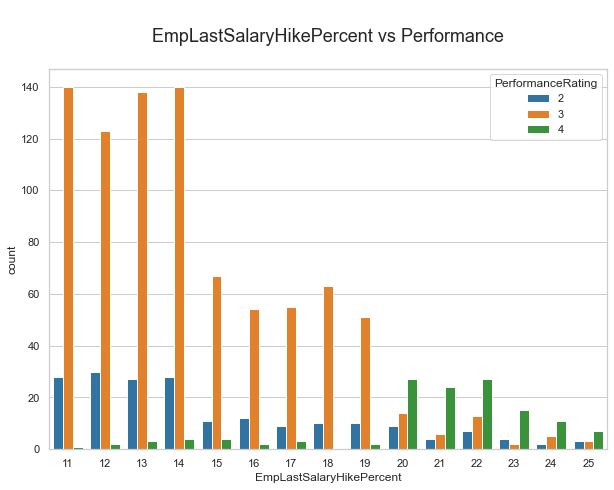

In [13]:
## To plot the graph EmpLastSalaryHikePercent vs Performance 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.countplot(x=df['EmpLastSalaryHikePercent'],hue= df["PerformanceRating"],palette='tab10')
plt.title("\nEmpLastSalaryHikePercent vs Performance\n",fontsize=18)
plt.show()

From the above graph, we can conclude that <br>
* More Number of Employees whose salary hike percentage belongs to 11-14 % are getting high performance rating.<br>
* Employees whose salary hike percentage is in between 20-22%, There performance rating is 4 <br>
* Number of Employees belongs to 15-19% are moderate in number while employees belongs to 20-25% salary hike percent are in less in number.




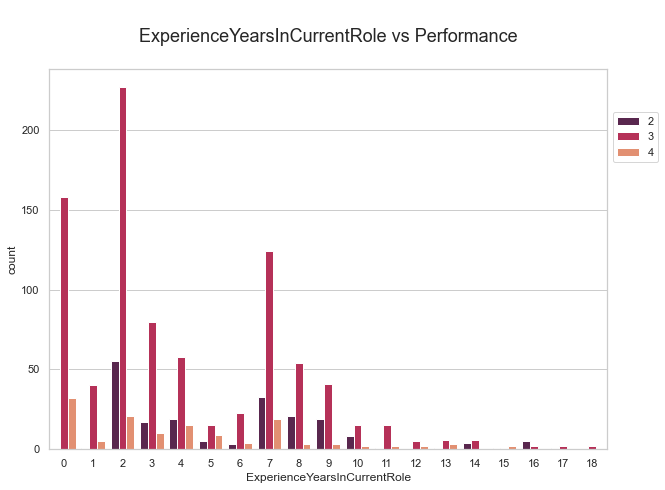

In [14]:
## To plot the graph ExperienceYearsInCurrentRole vs Performance 

plt.figure(figsize=(10,7))
ax = sns.countplot(x=df['ExperienceYearsInCurrentRole'],hue= df["PerformanceRating"],palette='rocket')
plt.title("\nExperienceYearsInCurrentRole vs Performance\n",fontsize=18)
plt.legend(bbox_to_anchor=(1.0, 0.9))
plt.show()

*   In given dataset,more number of employees have 2 years of experience for current role. which gives good performance rating.
*   Employees which have more than 9 year of experience are less in number & their performance is not so good for current role.
*  Employees which is fresher are moderate in number and their performance rating is seems to be good.


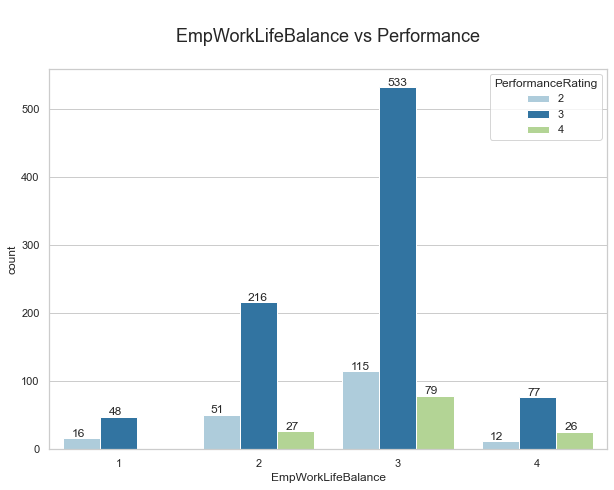

In [15]:
## To plot the graph EmpWorkLifeBalance vs Performance

plt.figure(figsize=(10,7))
ax = sns.countplot(x=df['EmpWorkLifeBalance'],hue= df["PerformanceRating"],palette='Paired')
plt.title("\nEmpWorkLifeBalance vs Performance\n",fontsize=18)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))
plt.show()

In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees<br>
In given datastet, level 1 & level 4 employees are less in number.

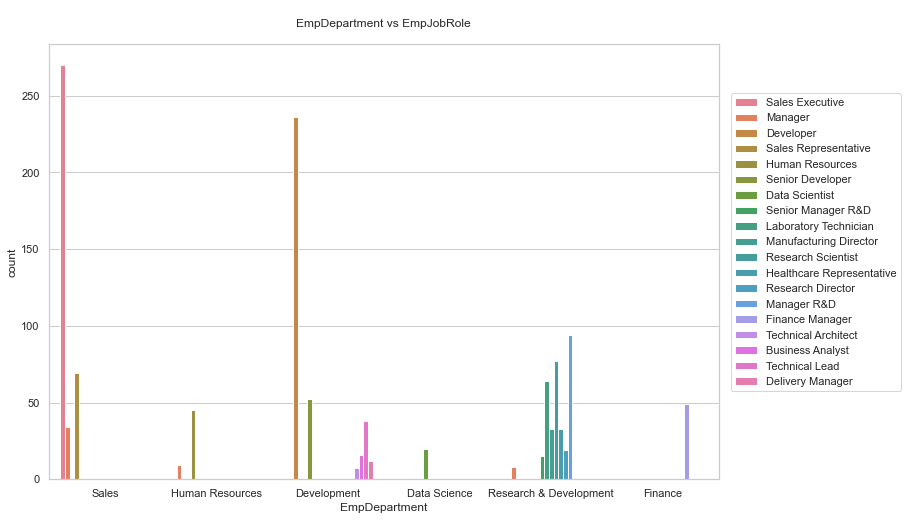

In [16]:
## To visualize the relationship between EmpDepartment vs EmpjobRole

plt.figure(figsize=(12,8))
sns.countplot(x=df["EmpDepartment"],hue= df['EmpJobRole'],palette='husl')
plt.title("\nEmpDepartment vs EmpJobRole\n")
plt.legend(bbox_to_anchor=(1.01, 0.9))
plt.show()

EmpDepartment is highly correlated with EmpJobRole

In [17]:
# Percent count of Gender with MaritalStatus

print("\033[1m\nPercent count of Gender with MaritalStatus:")
pd.crosstab(df["MaritalStatus"], df["Gender"], margins=True)


Percent count of Gender with MaritalStatus:


Gender,Female,Male,All
MaritalStatus,,,
Divorced,98,170,268
Married,215,333,548
Single,162,222,384
All,475,725,1200


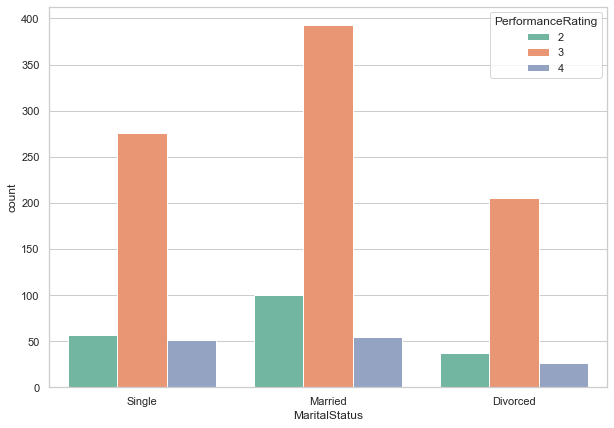

In [18]:
## Plotting the graph for Marital Status

plt.figure(figsize=(10,7))
ax = sns.countplot(x=df['MaritalStatus'],hue= df["PerformanceRating"],palette='Set2')

*  Married, Single & Divorced employees gives good performance rating.<br>
*  In given dataset, married employees are more in number after that Single & Divorced employees.


In [19]:
### To check the columns present

df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [20]:
## To visualize the performance rating in all numerical features

num_cols = df.loc[:,['EmpEducationLevel','EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction','EmpRelationshipSatisfaction',
       'TrainingTimesLastYear','EmpWorkLifeBalance']]


                                                       Performance Rating                                                       



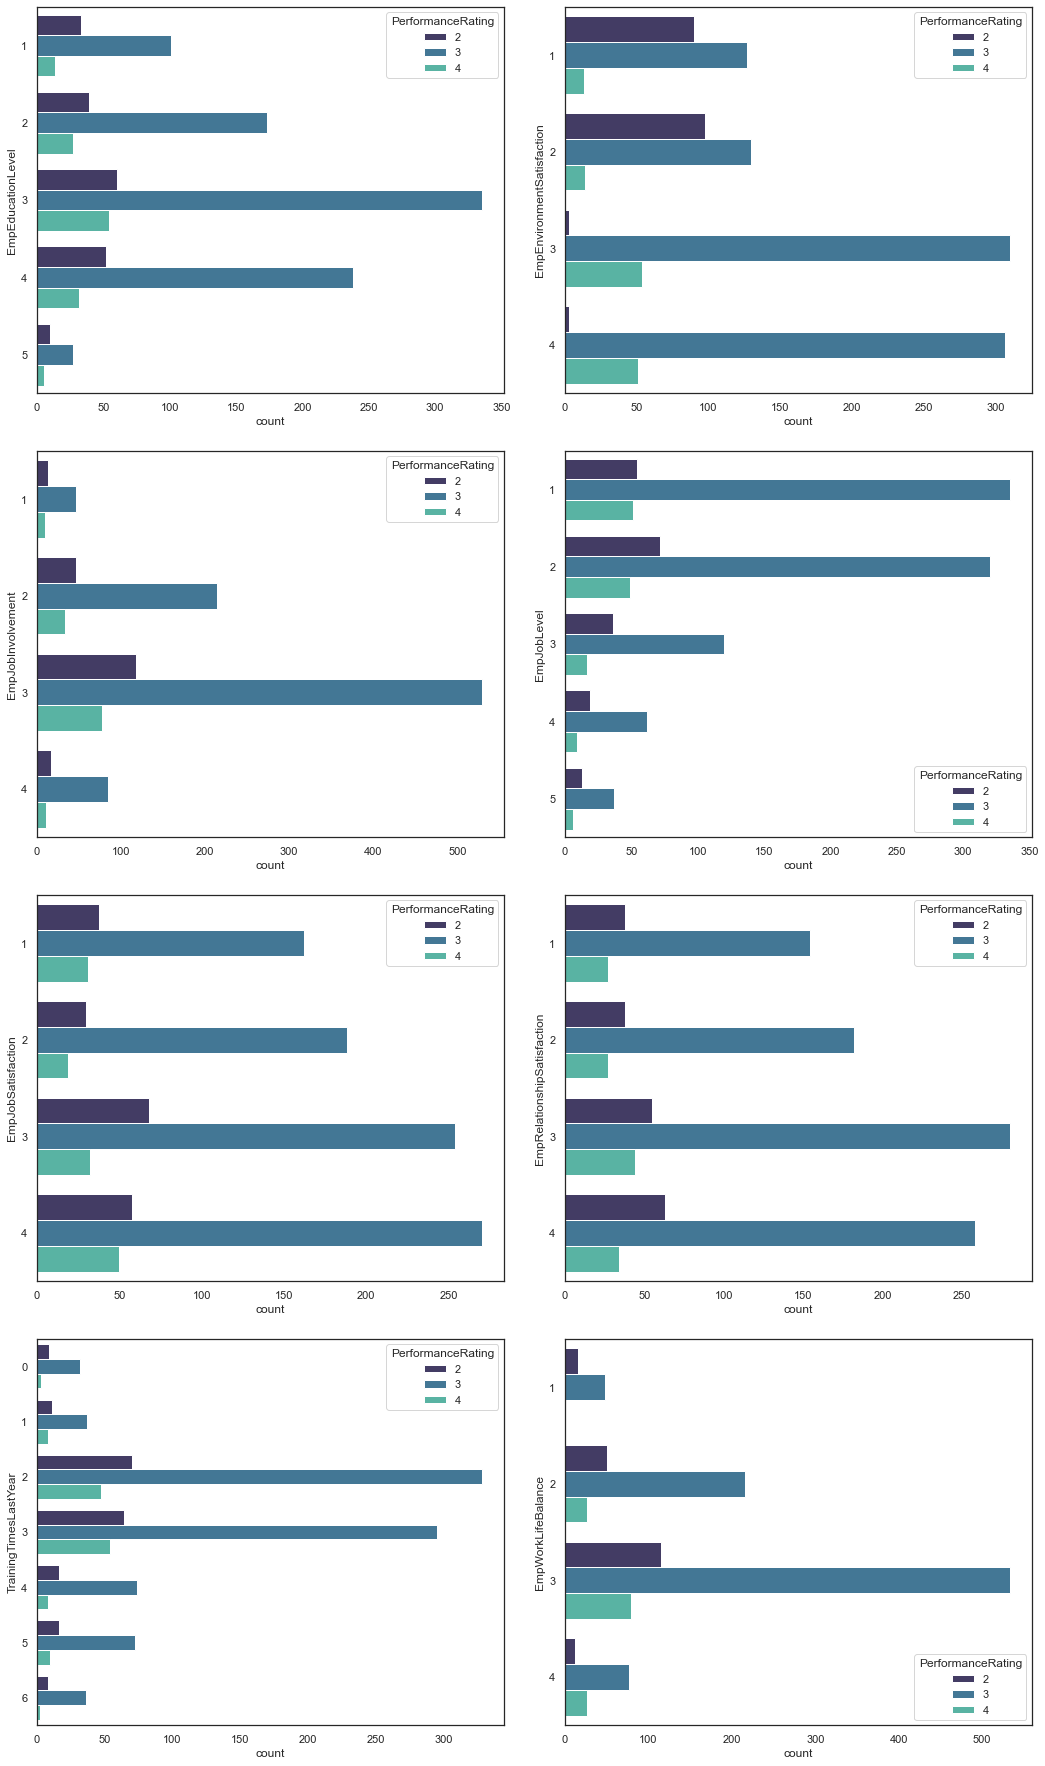

In [21]:
## To plot the Performance Rating of all numerical Features

fig = plt.figure(figsize=(15,25))

txt = "Performance Rating"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(num_cols.columns)):
    plt.subplot(4,2,index+1)
    sns.countplot( y =num_cols.iloc[:,index],hue=df["PerformanceRating"],palette='mako')
fig.tight_layout(pad=2)

#### From the above plots, we get following insights:
* The age distribution is starting from 18 to 60 where the most of the employees are lying between 30 to 40 age count
* Employees are worked in the multiple companies up to 8 companies where most of the employees worked up to 2 companies before getting to work here.
* The hourly rate range is 65 to 95 for majority employees work in this company.
* In General, Most of Employees work up to 5 years in this company. Most of the employees get 11% to 15% of salary hike in this company.

In [22]:
## For analysing the object type data

obj_cols  = df.select_dtypes(include="object")
obj_cols.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')


                                               Analysis for Categorical type data                                               



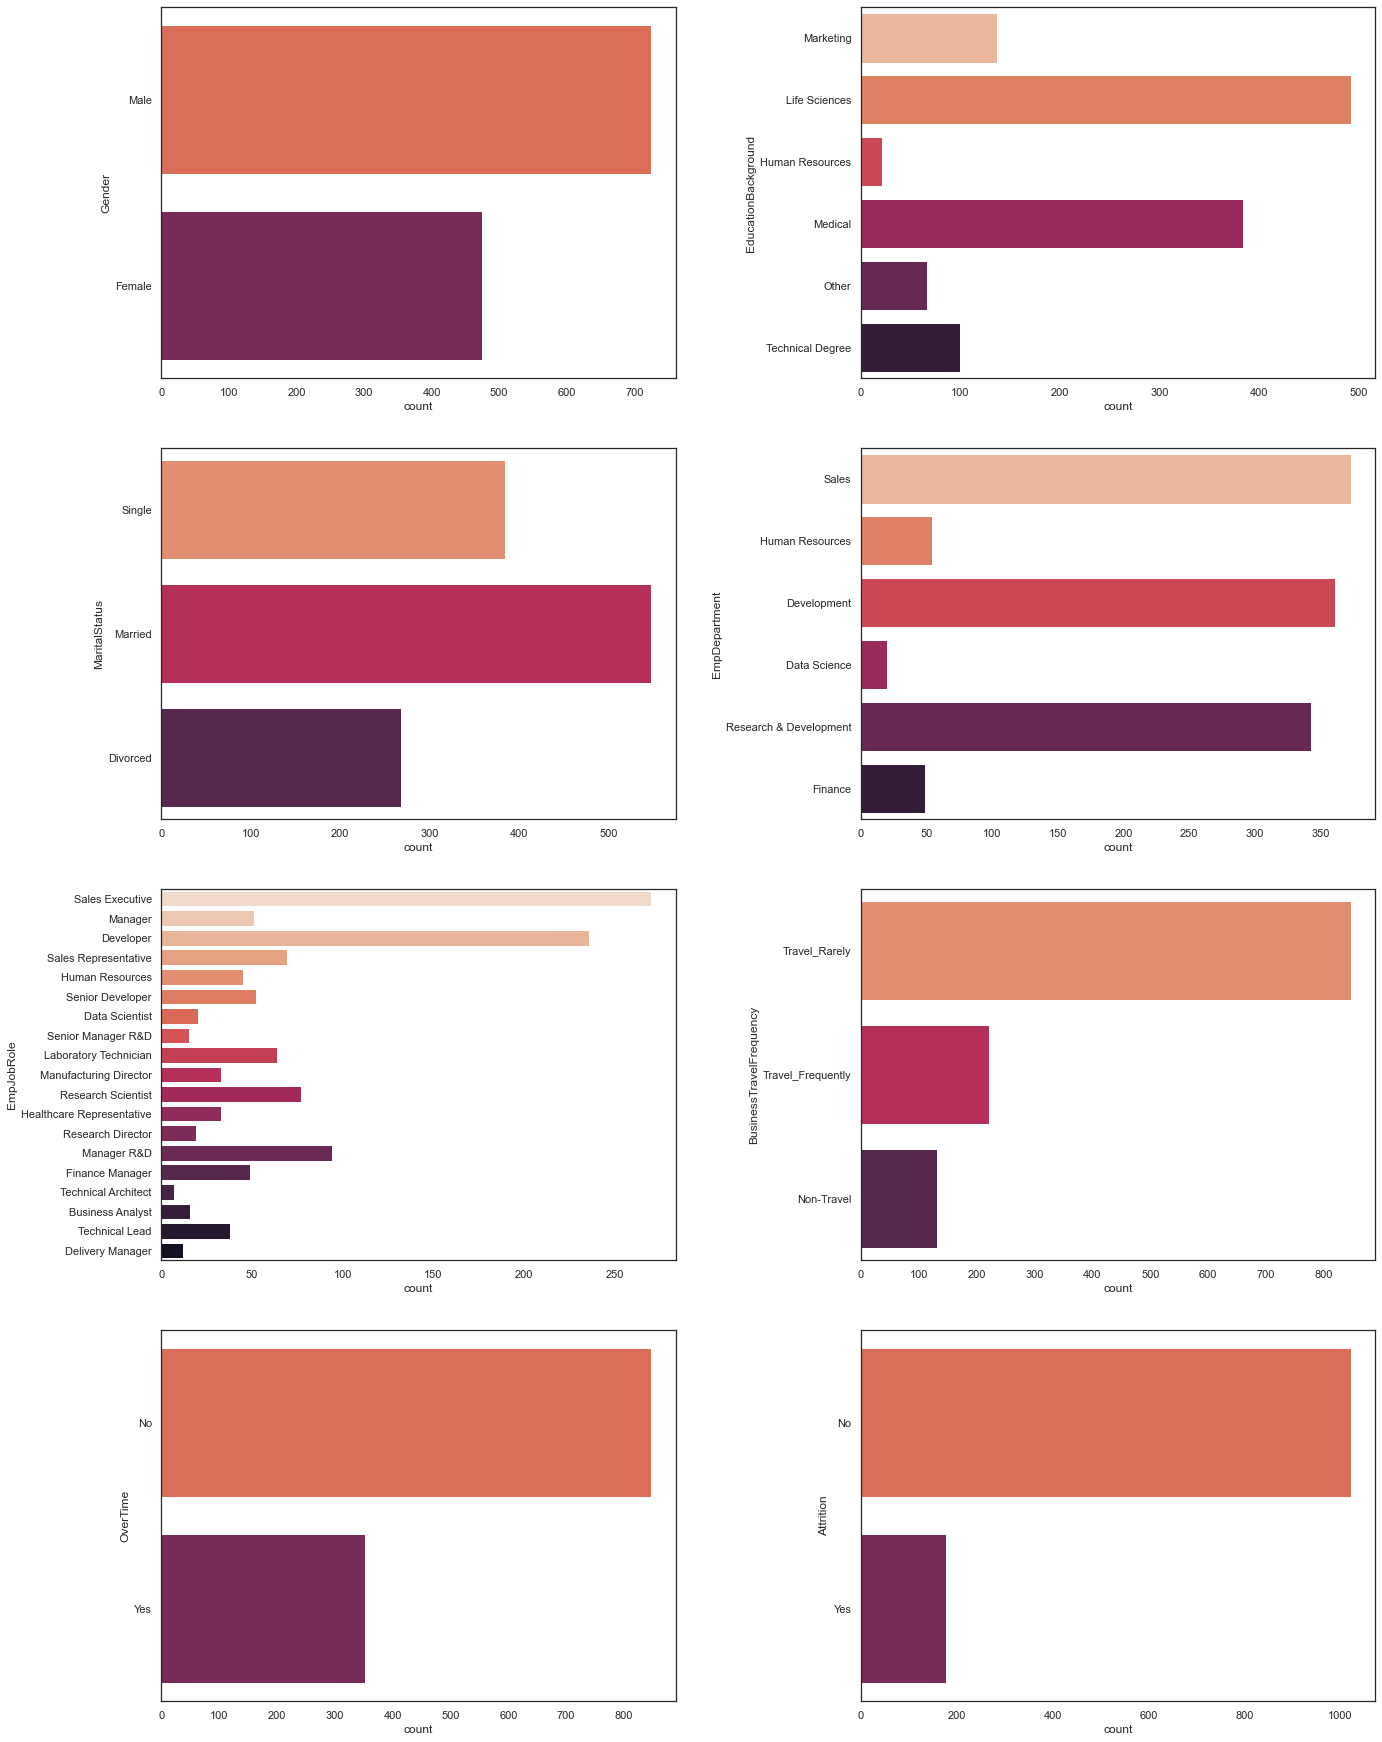

In [23]:
## Analysis for object type data

fig = plt.figure(figsize=(20,25))

txt = "Analysis for Categorical type data"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(obj_cols.columns)):
    plt.subplot(4,2,index+1)
    sns.countplot( y =obj_cols.iloc[:,index],palette='rocket_r')
fig.tight_layout(pad=3)

#### From the above plots, we get following insights:
* The Gender variance is divided by 60% of Male employees and 40% of Female employees in the company.
* The number of the educational backgrounds present in the employees is six unique backgrounds.
* Nineteen unique employee job roles are present in this company.
* The most of the employees are having the education level of 3
* The Job satisfaction level in this company is high level for the majority of employees.
* The 85% of employees are not having attrition in their work
* Only 11% of employees in the company were achieved level 4 - performance rating
* The overall percentage of employees doing overtime is 30%